In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# 1️⃣ Đọc dữ liệu từ file CSV
data = pd.read_csv("housing_data.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:

# 2️⃣ Tiền xử lý dữ liệu
# Chuyển các biến phân loại thành dạng số (One-Hot Encoding)

categorical_columns = [
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning",
    "prefarea", "furnishingstatus"
]
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nDữ liệu sau khi mã hóa:")
print(data_encoded.head())



Dữ liệu sau khi mã hóa:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurn

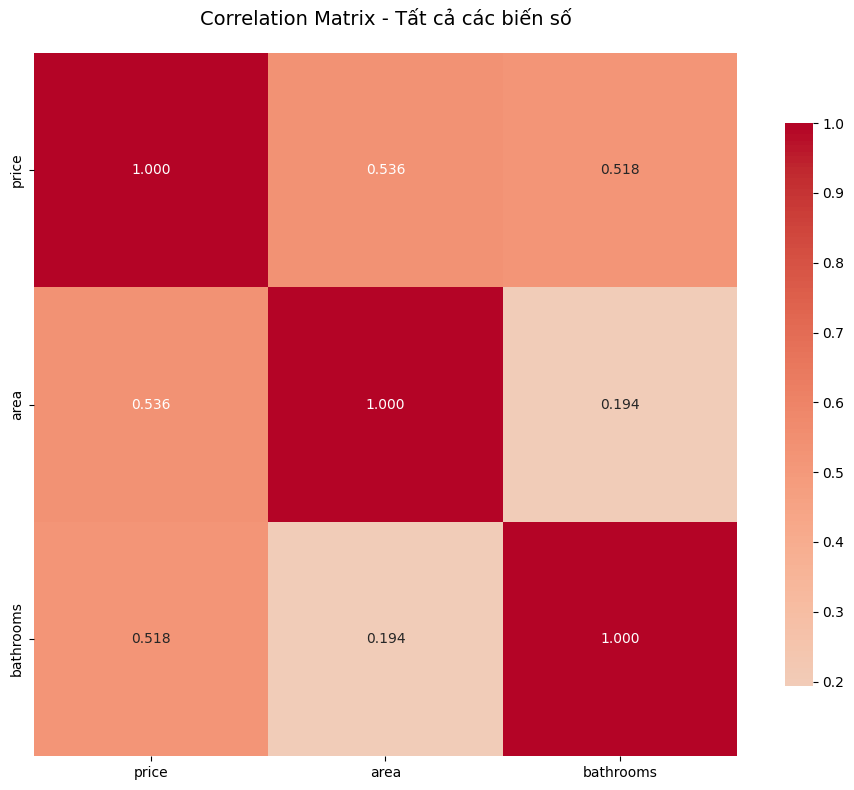

In [4]:
# Hiển thị giá trị tương quan của tất cả các cột
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tạo correlation matrix cho tất cả biến số
numeric_columns = ['price', 'area', 'bathrooms']
correlation_matrix = data[numeric_columns].corr()

# 2. Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Tất cả các biến số', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [5]:

# 3️⃣ Xác định X (biến độc lập) và y (biến phụ thuộc)
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]


In [6]:

# 4️⃣ Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [7]:

# 5️⃣ Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:

# 6️⃣ Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [9]:

# 7️⃣ Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Hệ số xác định R^2: {r2:.4f}")



Mean Squared Error (MSE): 1523019469501.29
Hệ số xác định R^2: 0.6463


In [10]:

# 8️⃣ In hệ số hồi quy
print("\nHệ số hồi quy:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept (β₀): {model.intercept_:.2f}")



Hệ số hồi quy:
area: 253.29
bedrooms: 80893.14
bathrooms: 1114751.18
stories: 417267.58
parking: 303111.24
mainroad_yes: 408073.68
guestroom_yes: 275710.53
basement_yes: 482603.52
hotwaterheating_yes: 616375.42
airconditioning_yes: 685839.35
prefarea_yes: 509192.09
furnishingstatus_semi-furnished: -121652.66
furnishingstatus_unfurnished: -391191.24
Intercept (β₀): 95784.23


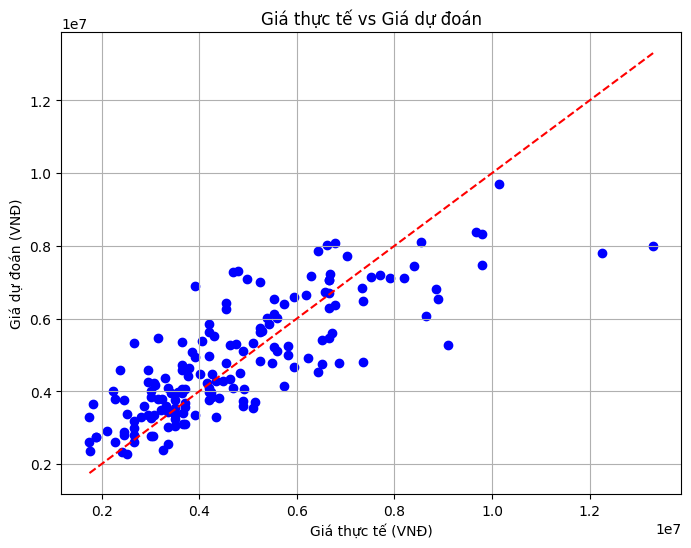

In [11]:

# 9️⃣ Trực quan hóa: So sánh giá thực tế và dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.title("Giá thực tế vs Giá dự đoán")
plt.xlabel("Giá thực tế (VNĐ)")
plt.ylabel("Giá dự đoán (VNĐ)")
plt.grid(True)
plt.show()
